<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/master/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and learning**
**Hilaire Bouaddi**

# **Abstract**

In this lab we studied both the gradient descent and Newton's method with scalar function. We will see that the implementation of those iterative methods is quite easy. The gradient descent gives great result whereas the Newton's method oscillates without a learning rate. 

# **Set up environment**

In [75]:
import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

The gradient descent is a technique used to find the minimum of a function. 
It is very famous because it is the technique used to train typical neural networks using the backpropagation algorithm. 

Newton's method is also iterative and it is used to find roots of continuously differentiable functions. 

# **Method**

## Function: Gradient descent method in $R^n$ 

We used algorithm 15.1 of the course. Also we make the hypothesis that the function is defined for x=0

In [73]:
# Input: objective function f(x) 
# Output: stationary point x* such that || grad(f)(x*) || < TOL

# dim is the dimension of the input space
def gradient_descent(f, alpha=0.1, TOL=1e-8, dim=1):
    x = np.zeros(dim)
    dfx = f.gradient(x)
    
    xs = [x]
    
    while np.linalg.norm(np.linalg.norm(dfx)) > TOL:
        x = x - alpha * dfx
        dfx = f.gradient(x)
        xs.append(x)
        
    return x, xs

## Function: Newton's method in $R^n$

Newton's method can be written as such: $x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{\nabla f(x^{(k)})}$

In [77]:
def newton_method(f, TOL=1e-8, dim=1, max_it=10000):
    # x = x - f/f'
    it = 0
    x = np.zeros(dim)
    xs = [x]
    while np.linalg.norm(f(x)) > TOL and it < max_it:
        it += 1
        x = x - f(x) / f.gradient(x)
        xs.append(x)
    return x, xs

# **Results**

Present the results. If the result is an algorithm that you have described under the *Methods* section, you can present the data from verification and performance tests in this section. If the result is the output from a computational experiment this is where you present a selection of that data. 

We will try to minimize this function $f(x) = sin(x_0) + cos(x_0)sin(x_1)$. We know that the minimum of this function is $-\sqrt2$

In [78]:
# Test: verify accuracy and convergence with respect to exact solution 
class Function:
    def __call__(self, x):
        return np.sin(x[0]) + np.cos(x[0])*np.sin(x[1])
        
    def gradient(self, x):
        return np.array([np.cos(x[0]) - np.sin(x[0])*np.sin(x[1]), np.cos(x[0])*np.cos(x[1])])

Text(0, 0.5, 'error')

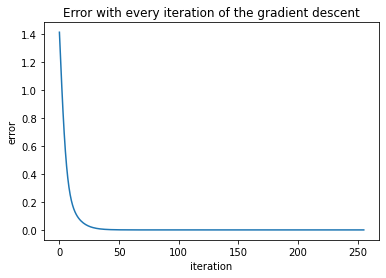

In [79]:
f = Function()

x_min, xs_min = gradient_descent(f, dim=2)

plt.plot(np.abs(np.array([f(x) for x in xs_min]) + np.sqrt(2)))
plt.title("Error with every iteration of the gradient descent")
plt.xlabel("iteration")
plt.ylabel("error")

The gradient descent kept getting better with the iterations until it reached the set tolerance. 

## Function: Newton's method in $R^n$

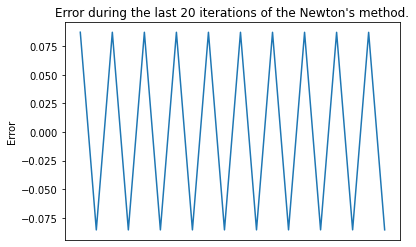

In [80]:
class Function2:
    def __call__(self, x):
        return np.exp(x[0] + x[1]) - 10
    
    def gradient(self, x): 
        return np.array([np.exp(x[0] + x[1]), np.exp(x[0] + x[1])])

f2 = Function2()
x, xs = newton_method(f2, dim=2)

plt.plot([f2(row) for row in xs[-20:]])
plt.title("Error during the last 20 iterations of the Newton's method.")
plt.ylabel("Error")
# removing x axis
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

It is interesting to see that we can not be more precise with Newton's method without introducing for example a learning rate or a momentum term. The width of this interval probably depends on the magnitude of the gradient. 

# **Discussion**

In conclusion, the gradient descent has very good results. It is able to minimize the function and be as precise as possible if the learning rate is small enough. Newton's method however cannot be as precise without a learning rate because the gradient can get smaller and smaller and we lose precision in the computation of the division.